In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import shap

In [13]:
titanic_data=pd.read_csv("./dataset/train.csv")

In [14]:
# removing null values of age and embarked

titanic_data['Embarked']=titanic_data['Embarked'].replace(np.nan,'S')
median=titanic_data['Age'].median()
titanic_data['Age']=titanic_data['Age'].replace(np.nan,median)

In [15]:
from sklearn import preprocessing
le_sex=preprocessing.LabelEncoder()
le_sex.fit(titanic_data.Sex.unique())
titanic_data.Sex=le_sex.transform(titanic_data.Sex)

from sklearn import preprocessing
le_Embarked=preprocessing.LabelEncoder()
le_Embarked.fit(titanic_data.Embarked.unique())
titanic_data.Embarked=le_Embarked.transform(titanic_data.Embarked)

from sklearn import preprocessing
le_Pclass=preprocessing.LabelEncoder()
le_Pclass.fit(titanic_data.Pclass.unique())
titanic_data.Pclass=le_Pclass.transform(titanic_data.Pclass)

In [16]:
titanic_data = titanic_data.drop(columns=['Ticket', 'Name'])

In [17]:
X = titanic_data[titanic_data.columns.difference(['Survived', 'Cabin'])]

In [18]:
X = X.fillna('Other')
X.head()

,Age,Embarked,Fare,Parch,PassengerId,Pclass,Sex,SibSp
0,22.0,2,7.2500,0,1,2,1,1
1,38.0,0,71.2833,0,2,0,0,1
2,26.0,2,7.9250,0,3,2,0,0
3,35.0,2,53.1000,0,4,0,0,1
4,35.0,2,8.0500,0,5,2,1,0


In [19]:
Y=titanic_data.iloc[:,1]

Y.isnull().sum()
Y.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test= train_test_split(X,Y,test_size=0.2,random_state=20)

from sklearn.ensemble import RandomForestClassifier

logmodel=RandomForestClassifier()

logmodel.fit(X_train, Y_train)

predictions=logmodel.predict(X_test)

/home/bipin/.local/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [21]:
from sklearn.metrics import classification_report

print(classification_report(Y_test, predictions))

              precision    recall  f1-score   support

           0       0.80      0.87      0.83       112
           1       0.74      0.64      0.69        67

    accuracy                           0.78       179
   macro avg       0.77      0.75      0.76       179
weighted avg       0.78      0.78      0.78       179



In [23]:
explainer = shap.TreeExplainer(logmodel)
shap_values = explainer.shap_values(X)

In [46]:
shap.initjs()
shap.force_plot(explainer.expected_value[0], shap_values[0], X)

In [50]:
shap_values[0][0]

array([ 0.05300841,  0.01068258,  0.06702906, -0.00122956, -0.04169205,
        0.07869995,  0.12869731, -0.01921256])

In [54]:
X.loc[0]

Age            22.00
Embarked        2.00
Fare            7.25
Parch           0.00
PassengerId     1.00
Pclass          2.00
Sex             1.00
SibSp           1.00
Name: 0, dtype: float64

In [55]:
# visualize the first prediction's explanation (use matplotlib=True to avoid Javascript)
shap.force_plot(explainer.expected_value[0], shap_values[0][0], X.loc[0])

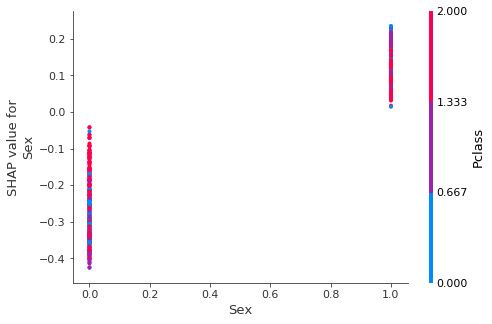

In [76]:
shap.dependence_plot("Sex", shap_values[0], X)

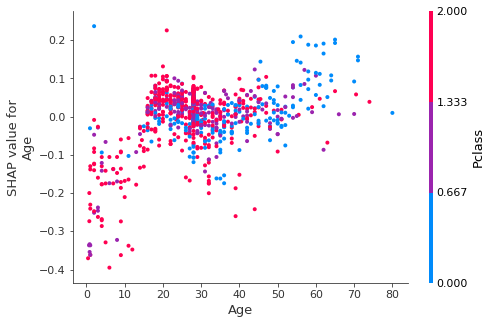

In [75]:
shap.dependence_plot("Age", shap_values[0], X)

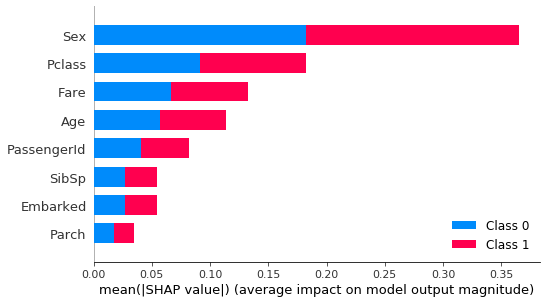

In [72]:
shap.summary_plot(shap_values, X)

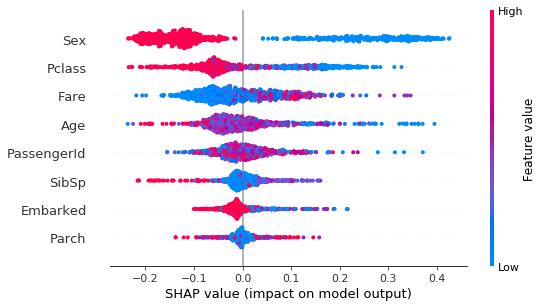

In [70]:
shap.summary_plot(shap_values[1], X)